In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Chemin vers le dossier contenant tes fichiers
chemin_dossier = '/shared/projects/almond_dw_snp/15_PopLDdecay/results'
df_list = []
fichiers = [f for f in os.listdir(chemin_dossier) if f.endswith('.popLD.out.stat')]

for fichier in fichiers:
    chemin_fichier = os.path.join(chemin_dossier, fichier)
    Chr_Pop = fichier.replace('.popLD.out.stat', '')
    Chr = Chr_Pop.split('.')[0]
    Pop = Chr_Pop.split('.')[1]
    df = pd.read_csv(chemin_fichier, sep='\t')  # Ajuster si nécessaire
    # Ajouter la colonne 'Sample' avec le nom extrait
    df['chromosome'] = Chr
    df['population'] = Pop
   
    df_list.append(df)

df_total = pd.concat(df_list, ignore_index=True)

# Vérifier le DataFrame concaténé
print(df_total.head())

   #Dist  Mean_r^2  Mean_D'     Sum_r^2  Sum_D'  NumberPairs chromosome  \
0      1    0.4500      NaN  18869.5448     NaN        41928       Pd02   
1      2    0.4124      NaN  14470.9926     NaN        35093       Pd02   
2      3    0.4031      NaN  13288.2303     NaN        32964       Pd02   
3      4    0.3966      NaN  12717.5728     NaN        32067       Pd02   
4      5    0.3942      NaN  12621.1066     NaN        32013       Pd02   

       population  
0  Pdulcis_N_Amer  
1  Pdulcis_N_Amer  
2  Pdulcis_N_Amer  
3  Pdulcis_N_Amer  
4  Pdulcis_N_Amer  


In [2]:
print(df_total.shape)

(16800000, 8)


In [15]:
# Initialiser le dataframe Max_LD avec la population et la valeur maximale de Mean_r^2
Max_LD = df_total.groupby('population')['Mean_r^2'].max().reset_index(name='Max_LD')
Max_LD['Distance'] = np.nan  # Créer une colonne pour les distances

# Boucle pour chaque population dans la liste
list_pop = ["Pdulcis_C_Asia", "Pdulcis_Euro_1", "Pdulcis_Euro_2", "Pdulcis_N_Amer", "Pfenzliana", "Porientalis", "Pspinosissima"] 

for i, pop in enumerate(list_pop):
    # Calculer la moitié de la valeur maximale de Mean_r^2 pour cette population
    half_max_LD = Max_LD.loc[Max_LD['population'] == pop, 'Max_LD'].values[0] / 2

    # Filtrer les données pour cette population
    temp = df_total[df_total['population'] == pop]
    
    # Trouver l'index de la ligne la plus proche de half_max_LD
    index = (np.abs(temp['Mean_r^2'] - half_max_LD)).idxmin()
    closest_row = temp.iloc[index]
    
    # Extraire la distance correspondante
    Dist = closest_row['Dist']
    
    # Mettre à jour la distance dans le dataframe Max_LD
    Max_LD.at[i, 'Distance'] = Dist

print(Max_LD)


IndexError: index 0 is out of bounds for axis 0 with size 0

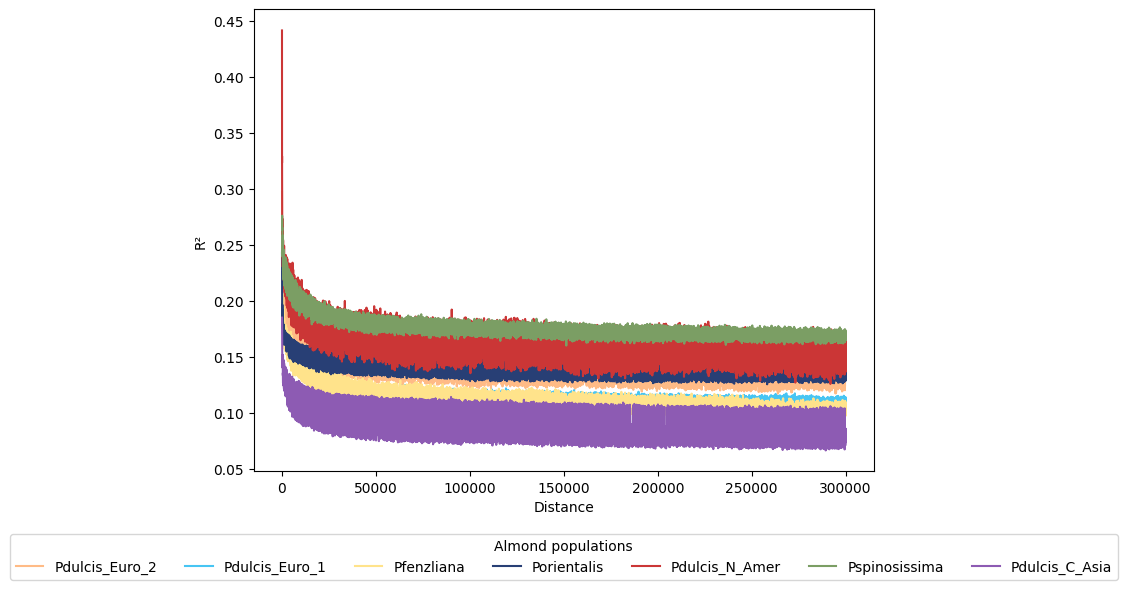

In [13]:
import statsmodels.api as sm

couleurs = {
    'Pdulcis_C_Asia': '#8d5bb3',
    'Pdulcis_Euro_1': '#47c5f3',
    'Pdulcis_Euro_2': '#ffbb86',
    'Pdulcis_N_Amer': '#cb3636',
    'Pfenzliana': '#ffe38b',
    'Porientalis': '#283f75',
    'Pspinosissima': '#7b9e64'
}

df_sample = df_total.sample(frac=0.005, random_state=42)  # Adjust 'frac' to your needs

# Créer un boxplot
plt.figure(figsize=(8, 6))
sns.lineplot(x='#Dist', y='Mean_r^2', hue= 'population', palette=couleurs, data=df_sample)
# sns.lmplot(x='#Dist', y='Mean_r^2', hue= 'population', palette=couleurs, data=df_sample, lowess=True)

# plt.title('Distribution de la diversité génétique (Pi)')
plt.xlabel('Distance')
plt.ylabel('R²')
plt.legend(title='Almond populations', loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=7)  # Ajuste selon tes besoins
plt.show()